## Định nghĩa văn phạm

Văn phạm phi ngữ cảnh

https://en.wikipedia.org/wiki/Greibach_normal_form

In [1]:
class Grammar:
    Name= 'G'
    Sigma= [] #Tập kí hiệu cơ bản
    V= [] # Tập kí hiệu bổ sung
    sigma= '𝜎' # Ký hiệu xuất phát của văn phạm
    P= [] #rules Các quy tắc thay thế
    
    def display(self):
        print('%s= (Σ,𝑉,𝜎,𝑃)' % self.Name)
        print('Σ= ' + str(self.Sigma))
        print('𝑉= ' + str(self.V))
        print('𝜎= ' + self.sigma)
        tmp= [ '%s → %s' % rule for rule in self.P]
        print('𝑃= ' + '{' + ', '.join(tmp) + '}')

In [2]:
G= Grammar()
G.Sigma= {'a', 'b'}
G.sigma= '𝜎'
G.V= {G.sigma, 'A', 'B'}
G.P= {(G.sigma, 'AB'), 
      ('A', 'aAb'), 
      ('A', 'b'), 
      ('B', 'bBa'), 
      ('B', None)}
G.display()

In [3]:
w= 'abbba'

## Thuật toán phân tích từ trên xuống kiếm tra xâu có thuộc văn phạm

#### Input:
Văn phạm phi ngữ cảnh $G= (\Sigma, V, \sigma, P)$ không đệ quy trái và xấu $\omega = a_1a_2...a_n \in \Sigma^*$

#### Output
Cây suy dẫn của $\omega$ nếu $\omega \in L(G)$ và thông báo lỗi nếu $\omega \not \in L(G)$

#### Code

In [4]:
def search(G, w):
    memo = dict()
    def solve(f, t):
        # Tìm đường đi để xâu f trở thành xâu t trong văn phạm G
        if len(f) == 0:
            return False
        if len(t) == 0:
            return len(f) == 0
        T = f[0]
        v = t[0]
        if (T,v) in memo:
            return memo[(T,v)]
        print(T,v)
        if T in G.V:
            for rule in G.P:
                if T == rule[0]:
                    if rule[1] is None:
                        r= solve(f[1:], w)
                        memo[(T,v)] = r
                    else:
                        r= solve(rule[1] + f[1:], w)
                        memo[(T,v)] = r
            return False
        elif T in G.Sigma:
            if T == v:
                r= solve(f[1:], w[1:])
                memo[(T,v)] = r
            else:
                memo[(T,v)] = False
    
    result= solve(G.sigma, w)
    return result

In [5]:
from binarytree import tree, bst, heap
my_bst = bst(height=5, is_perfect=False)
print(my_bst) 

In [6]:
def _build_tree_string(root, curr_index, index=False, delimiter='-'):
    """Recursively walk down the binary tree and build a pretty-print string.
    In each recursive call, a "box" of characters visually representing the
    current (sub)tree is constructed line by line. Each line is padded with
    whitespaces to ensure all lines in the box have the same length. Then the
    box, its width, and start-end positions of its root node value repr string
    (required for drawing branches) are sent up to the parent call. The parent
    call then combines its left and right sub-boxes to build a larger box etc.
    :param root: Root node of the binary tree.
    :type root: binarytree.Node | None
    :param curr_index: Level-order_ index of the current node (root node is 0).
    :type curr_index: int
    :param index: If set to True, include the level-order_ node indexes using
        the following format: ``{index}{delimiter}{value}`` (default: False).
    :type index: bool
    :param delimiter: Delimiter character between the node index and the node
        value (default: '-').
    :type delimiter:
    :return: Box of characters visually representing the current subtree, width
        of the box, and start-end positions of the repr string of the new root
        node value.
    :rtype: ([str], int, int, int)
    .. _Level-order:
        https://en.wikipedia.org/wiki/Tree_traversal#Breadth-first_search
    """
    if root is None:
        return [], 0, 0, 0

    line1 = []
    line2 = []
    if index:
        node_repr = '{}{}{}'.format(curr_index, delimiter, root.value)
    else:
        node_repr = str(root.value)

    new_root_width = gap_size = len(node_repr)

    # Get the left and right sub-boxes, their widths, and root repr positions
    l_box, l_box_width, l_root_start, l_root_end = \
        _build_tree_string(root.left, 2 * curr_index + 1, index, delimiter)
    r_box, r_box_width, r_root_start, r_root_end = \
        _build_tree_string(root.right, 2 * curr_index + 2, index, delimiter)

    # Draw the branch connecting the current root node to the left sub-box
    # Pad the line with whitespaces where necessary
    if l_box_width > 0:
        l_root = (l_root_start + l_root_end) // 2 + 1
        line1.append(' ' * (l_root + 1))
        line1.append('_' * (l_box_width - l_root))
        line2.append(' ' * l_root + '/')
        line2.append(' ' * (l_box_width - l_root))
        new_root_start = l_box_width + 1
        gap_size += 1
    else:
        new_root_start = 0

    # Draw the representation of the current root node
    line1.append(node_repr)
    line2.append(' ' * new_root_width)

    # Draw the branch connecting the current root node to the right sub-box
    # Pad the line with whitespaces where necessary
    if r_box_width > 0:
        r_root = (r_root_start + r_root_end) // 2
        line1.append('_' * r_root)
        line1.append(' ' * (r_box_width - r_root + 1))
        line2.append(' ' * r_root + '\\')
        line2.append(' ' * (r_box_width - r_root))
        gap_size += 1
    new_root_end = new_root_start + new_root_width - 1

    # Combine the left and right sub-boxes with the branches drawn above
    gap = ' ' * gap_size
    new_box = [''.join(line1), ''.join(line2)]
    for i in range(max(len(l_box), len(r_box))):
        l_line = l_box[i] if i < len(l_box) else ' ' * l_box_width
        r_line = r_box[i] if i < len(r_box) else ' ' * r_box_width
        new_box.append(l_line + gap + r_line)

    # Return the new box, its width and its root repr positions
    return new_box, len(new_box[0]), new_root_start, new_root_end


In [7]:
class Node:
    def __init__ (self, value, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right
        
    def __str__(self):
        s= self.value
        if not self.left is None:
            s+= str(self.left)
        if not self.right is None:
            s+= str(self.right)
        return s

In [8]:
root = Node('A')
root.left= Node('B')
root.right= Node('C')
root.right.left= Node('D')
print(root)

ABCD


In [18]:
import sklearn.datasets as datasets
import pandas as pd
iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
y=iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(df,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

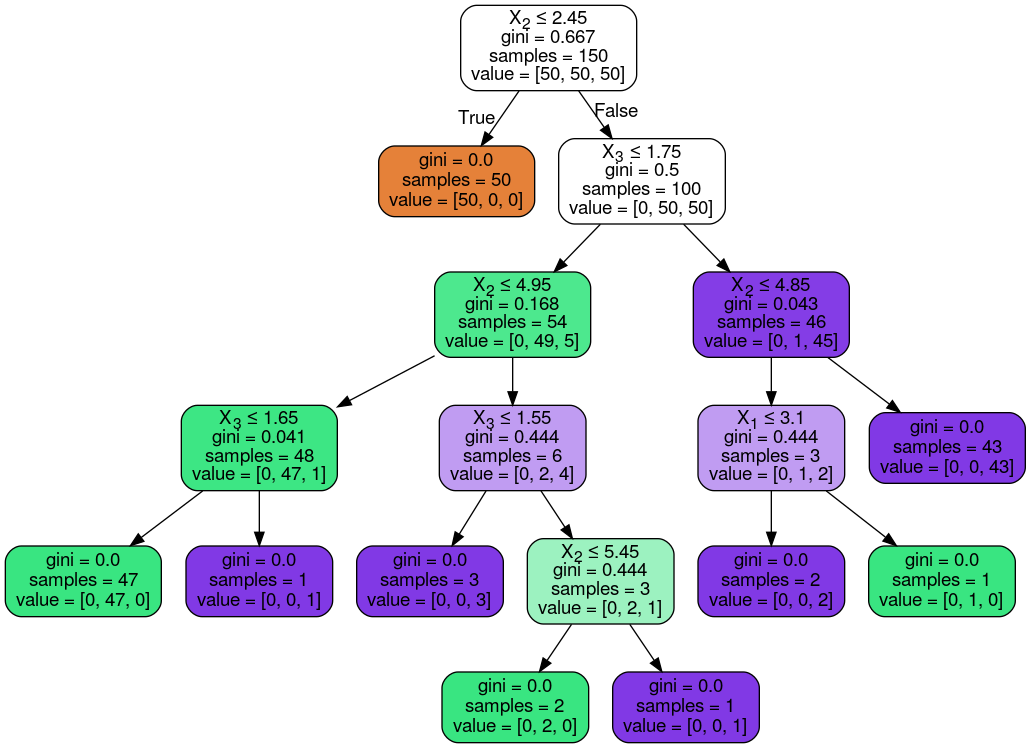

In [17]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())